# Definindo um modelo de classificação com machine learning para analisar churn de clientes

## Objetivo do projeto

Este projeto tem como objetivo definir um modelo preditivo de classificação utilizando machine learning para avaliar os caso de churn de clientes em uma empresa.

Isto será feito de tal forma a avaliar as métricas de performance para cada modelo testado, escolhendo apenas um deles que apresentou o melhor desempenho. 

## Sobre os dados

O dataset disponibilizado contempla diversas informações a respeito dos clientes desta compania. Dentre elas existem dados categóricos e dados numéricos, conforme as listas abaixo. 

Variáveis numéricas:

- Tenure = Número de meses que o cliente está na base
- MonthlyCharges = A quantia consumida por cliente mensalmente
- TotalCharges = A quantia consumida por cliente total

Variáveis categóricas:
- CustomerID = Id do cliente
- Gender = gênero do cliente
- SeniorCitizen = informação a respeito da idade do cliente
- Partner = se o cliente é ou não casado
- Dependents = se o cliente tem dependentes
- PhoneService = cliente tem serviço telefonico
- MulitpleLines = se o cliente tem várias linhas ou não
- InternetService = tipo do serviço de internet
- OnlineSecurity = se o cliente tem segurança online
- OnlineBackup = se o cliente tem Backup Online
- DeviceProtection = se o cliente tem proteção do dispositivo
- TechSupport = se o cliente tem suporte técnico
- StreamingTV = se o cliente tem streaming de TV
- StreamingMovies = se o cliente tem serviço de streaming de filmes
- Contract = termo de contrato do cliente
- PaperlessBilling = se o cliente tem ou não boleto sem papel
- PaymentMethod = método de pagamento do cliente

E, além disso, existe ainda a variável "target" ou objetivo, ao qual deseja prever seus valores,

- Churn = Cliente deu churn ou não

## Bibliotecas utilizadas

Para fazer este projeto, foram utilizadas as seguintes bibliotecas do Python,

In [1]:
# libs de análise e manipulação dos dados
import pandas as pd
import numpy as np

# libs de visualização dos e análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# libs de machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

## Importando os dados

Primeiro, importou-se o dataset 'churn_data.xlsx', disponível na lista de arquivos deste repositório, utilizando-se a biblioteca Pandas,

In [2]:
df = pd.read_excel('churn_data.xlsx')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


A fim de melhorar a disposição dos dados e facilitar alguns processos futuros, definiu-se o índice deste Data Frame como sendo a coluna de 'customerID',

In [3]:
df.set_index('customerID', inplace = True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Análise descritiva e exploratória dos dados

Exibindo-se mais informações a respeito deste dataset,

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null 

Pelos resultados, sabe-se que este dataset tem ao todo 7032 linhas, sendo que não existe dado nulo em nenhuma das 20 colunas, visto que para todas elas temos um total de 7032 entradas não nula. Além disso, é possível avaliar que existem 16 colunas com dados do tipo 'object', duas colunas com dados em números inteiros e outras duas com dados do tipo flutante, ou número decimal. Dados do tipo 'object' pode significar que só existem dados em texto na coluna, ou que existem mais de um tipo de dado na mesma coluna.

### Dados duplicados

Avaliando-se agora se existem linhas duplicadas neste dataset,

In [5]:
df.duplicated().sum()

22

Logo, existem ao todo 22 linhas duplicadas no dataset. Exibindo-se as primeiras 5 delas,

In [6]:
df[df.duplicated(keep=False)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
6380-ARCEH,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
2866-IKBTM,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
0887-HJGAR,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
3030-ZKIWL,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
8262-COGGB,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
9117-SHLZX,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
5875-YPQFJ,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
5552-ZNFSJ,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,45.30,45.30,Yes


Observando os resultados acima, percebe-se que estas linhas duplicadas se tratam na verdade de clientes diferentes que apresentam as mesmas características familiares e contrataram exatamente o mesmo serviço da empresa, por isto as contas pagas "MonthlyCharges" e "TotalCharges" também são iguais.

E de fato se tratam de clientes pois o 'customerID' de cada um deles é diferente. Logo, se importarmos novamente o dataset sem colocar a coluna de 'customerID' como índice, ao calcularmos o total de linhas duplicadas, o resultado será zero.

Portanto, as linhas duplicadas não serão excluídas.


### Estatística Descritiva e Outliers

Observando agora as estatísticas descritivas das variáveis numéricas presentes no dataset,

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Pelo resultado acima, é possível avaliar que provalvelmente a coluna 'SeniorCitizen' apresentará outliers, visto que o valor do desvio padrão é relativamente maior que a média, considerando ainda que 75% dos dados desta coluna são iguais a 0 e o valor máximo encontrado foi igual a 1. Para as demais colunas numéricas, as médias são próximas da mediana, ou segundo quartil 50%, exceto na coluna 'TotalCharges' que tem média igual a 2283 e mediana de 1397.

Abaixo foram plotados os gráficos de histograma de cada uma delas,

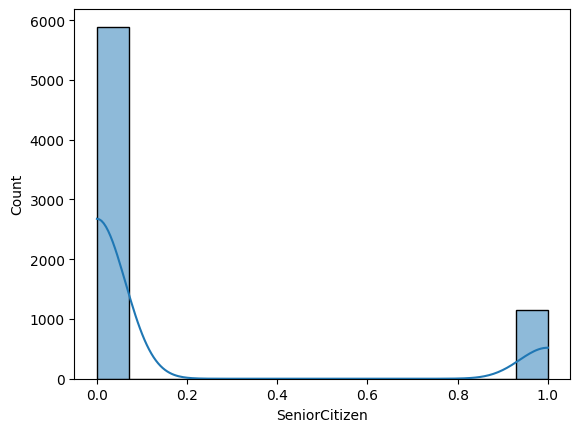

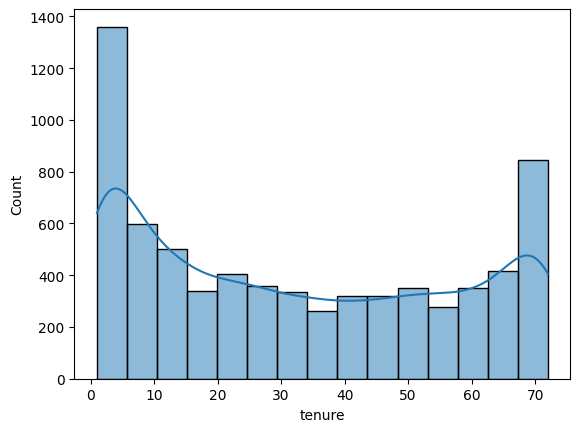

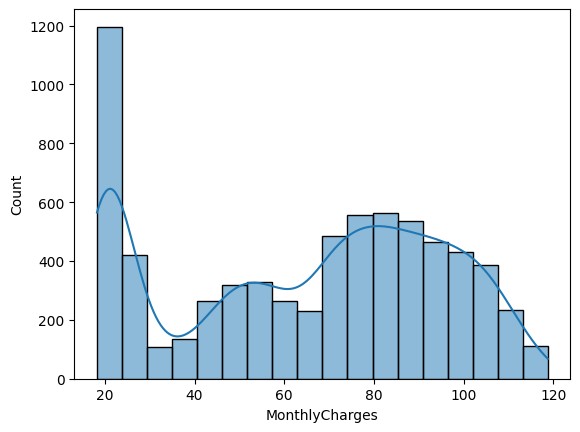

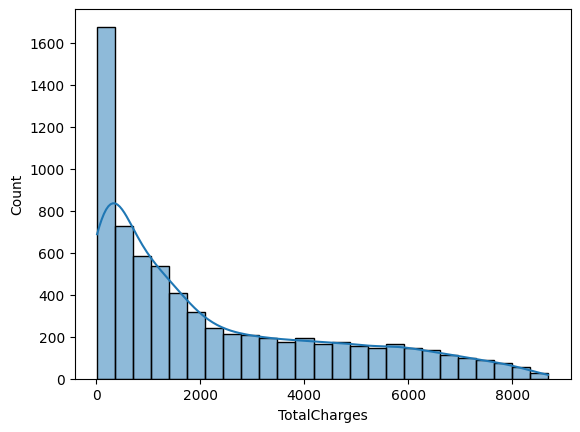

In [8]:
for coluna in df.select_dtypes('number').columns:
    sns.histplot(data = df, x = df[coluna], kde = True)
    plt.show()

Pelos gráficos acima, percebe-se um comportamento mais ou menos conforme o previsto, onde as colunas 'MonthlyCharges' e 'TotalCharges' tem uma maior concentração de dados em valores menores, o que faz sentido pois existem mais clientes que assinaram o plano de serviços mais barato.

Além disso, fica claro que a coluna 'SeniorCitizen' na verdade é uma coluna binária, somente com resultados iguais a 0 ou 1. E, como a maioria esmagadora dos dados são iguais a 0, os dados iguais a 1 serão considerados outliers. Para validar isso, abaixo foi exibida a quantidade exata de cada um dos valores presentes nesta coluna e em seguida foi calculado a quantidade de outliers encontrados.

In [9]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

In [10]:
# função para calcular a quantidade de outliers

def is_outlier (array):
    q1, q3 = np.quantile(array, [0.25, 0.75])
    iqr = q3 - q1

    upper_outlier = q3 + 1.5*iqr
    lower_outlier = q1 - 1.5*iqr

    return ((array<lower_outlier) | (array>upper_outlier))

In [11]:
# definindo um data frame com a quantidade de outliers por coluna

outliers_df = (
    df.select_dtypes('number').apply(is_outlier)
    .sum()
    .reset_index()
    .rename(
        columns = {
            'index': 'Colunas numéricas',
            0: 'Quantidade de outliers'
        }
    )
)

outliers_df

,Colunas numéricas,Quantidade de outliers
0,SeniorCitizen,1142
1,tenure,0
2,MonthlyCharges,0
3,TotalCharges,0


Logo, de fato todos os dados 1 são considerados outliers. Contudo, como eles são informações importantes para o dataset e não são provenientes de erros, eles não vão ser excluídos da análise.

## Modelling

### Separando as variáveis explicativas e da variável target

#### Tratando as variáveis categóricas explicativas

Relembrando as colunas do dataset,

In [12]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Avaliando os dados de cada coluna categórica (exceto o target "Churn"),

In [13]:
for coluna in df.columns:
    if df[coluna].dtype == 'object' and coluna != 'Churn':
        print(f'Coluna = {coluna} | dados = {df[coluna].unique()}')

Coluna = gender | dados = ['Female' 'Male']
Coluna = Partner | dados = ['Yes' 'No']
Coluna = Dependents | dados = ['No' 'Yes']
Coluna = PhoneService | dados = ['No' 'Yes']
Coluna = MultipleLines | dados = ['No phone service' 'No' 'Yes']
Coluna = InternetService | dados = ['DSL' 'Fiber optic' 'No']
Coluna = OnlineSecurity | dados = ['No' 'Yes' 'No internet service']
Coluna = OnlineBackup | dados = ['Yes' 'No' 'No internet service']
Coluna = DeviceProtection | dados = ['No' 'Yes' 'No internet service']
Coluna = TechSupport | dados = ['No' 'Yes' 'No internet service']
Coluna = StreamingTV | dados = ['No' 'Yes' 'No internet service']
Coluna = StreamingMovies | dados = ['No' 'Yes' 'No internet service']
Coluna = Contract | dados = ['Month-to-month' 'One year' 'Two year']
Coluna = PaperlessBilling | dados = ['Yes' 'No']
Coluna = PaymentMethod | dados = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Pelo resultado acima, percebe-se que todas as variáveis categóricas explicativas do dataset apresentam poucas respostas diferentes. Isso faz com que seja viável utilizar o método One Hot Encoder para tratar elas e convertê-las em dados numéricos, visto que este método irá converter cada uma destas respostas em novas colunas, atribuindo 1 ou 0 para a existência ou não daquela característica para cada cliente. Como são criadas novas colunas com este tipo de tratamento, caso as variáveis acima tivessem muitas respostas diferentes, seriam criadas colunas de forma excessiva, prejudicando o funcionamento do modelo futuramente.

Desta forma, segue abaixo o tratamento via One Hot Encoder,

In [14]:
# lista com as variáveis explicativas categóricas
categorical_columns = [coluna for coluna in df.columns if df[coluna].dtype == 'object' and coluna != 'Churn']

In [15]:
# chamando o método One Hot Encoder
encoder = OneHotEncoder(drop = 'if_binary')

# treinando-o com as variáveis explicativas categóricas
encoder.fit(df[categorical_columns])

OneHotEncoder(drop='if_binary')

In [16]:
# definindo o grupo x das variáveis explicativas que irá receber as variáveis tratadas
x = pd.DataFrame(
    data = encoder.transform(df[categorical_columns]).toarray(),
    columns = encoder.get_feature_names_out(),
    index = df.index
)

In [17]:
x.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5575-GNVDE,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3668-QPYBK,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7795-CFOCW,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9237-HQITU,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#### Adicionando as variáveis numéricas no conjunto das explicativas

Agora, é possível adicionar as variáveis numéricas no conjunto "x" criado acima das variáveis explicativas,

In [18]:
# lista com as variáveis explicativas numéricas
num_columns = df.select_dtypes('number').columns.to_list()

In [19]:
# adicionando as variáveis ao conjunto
x = x.join(df[num_columns], on = x.index)

In [20]:
x.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,1,29.85,29.85
5575-GNVDE,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,34,56.95,1889.50
3668-QPYBK,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0,2,53.85,108.15
7795-CFOCW,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,45,42.30,1840.75
9237-HQITU,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,2,70.70,151.65


#### Normatizando os dados das variáveis explicativas com StandardScaler

Agora, com os dados numéricos adicionados, se torna necessário a normatização destes dados explicativos, visto que a escala deles é bem diferente. Por exemplo, temos dados que variam de 0 a 1 e também temos a coluna "TotalCharges" com dados chegando na casa de 8000. Isso prejudica a performance do modelo de machine learning. Portanto, utilizou-se da função StandardScaler para fazer tal tratamento, conforme segue abaixo.

In [21]:
scaler = StandardScaler()

scaler.fit(x)
x = pd.DataFrame(
    data = scaler.transform(x),
    columns = x.columns,
    index = x.index
)

In [22]:
x.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,-1.009430,1.035617,-0.652305,-3.056334,-0.963411,3.056334,-0.854336,1.382243,-0.886896,-0.52513,...,-0.561364,0.828939,-0.529976,-0.525351,1.404764,-0.543604,-0.440327,-1.280248,-1.161694,-0.994194
5575-GNVDE,0.990658,-0.965608,-0.652305,0.327189,1.037979,-0.327189,-0.854336,1.382243,-0.886896,-0.52513,...,-0.561364,-1.206361,-0.529976,-0.525351,-0.711863,1.839576,-0.440327,0.064303,-0.260878,-0.173740
3668-QPYBK,0.990658,-0.965608,-0.652305,0.327189,1.037979,-0.327189,-0.854336,1.382243,-0.886896,-0.52513,...,-0.561364,0.828939,-0.529976,-0.525351,-0.711863,1.839576,-0.440327,-1.239504,-0.363923,-0.959649
7795-CFOCW,0.990658,-0.965608,-0.652305,-3.056334,-0.963411,3.056334,-0.854336,1.382243,-0.886896,-0.52513,...,-0.561364,-1.206361,1.886879,-0.525351,-0.711863,-0.543604,-0.440327,0.512486,-0.747850,-0.195248
9237-HQITU,-1.009430,-0.965608,-0.652305,0.327189,1.037979,-0.327189,-0.854336,-0.723462,1.127527,-0.52513,...,-0.561364,0.828939,-0.529976,-0.525351,1.404764,-0.543604,-0.440327,-1.239504,0.196178,-0.940457


Agora sim os dados de todas as variáveis explicativas estão todos na mesma escala, padronizados.

#### Tratando a variável target "Churn"

Tratadas as variáveis explicativas, agora é necessário tratar a variável target "Churn". Para isso, utilizou-se da função LabelEncoder demonstrada a seguir,

In [23]:
le = LabelEncoder()

y = pd.DataFrame(
    data = le.fit_transform(df['Churn']),
    columns = ['Churn'],
    index = df.index
)

In [24]:
y.head()

,Churn
customerID,
7590-VHVEG,0
5575-GNVDE,0
3668-QPYBK,1
7795-CFOCW,0
9237-HQITU,1


### Separando as bases de treino e teste

Feitos os devidos tratamentos nas variáveis e separados os conjuntos das explicativas e target, agora é possível dividi-los em base de treino e teste. 

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y['Churn'], test_size = 0.2, random_state = 42)

### Modelo de Regressão Logística

O primeiro modelo de classificação a ser testado será o de Regressão Logística. Desta forma, segue o código abaixo.

In [26]:
# definindo o modelo
lr = LogisticRegression()

# treinando-o
lr_model = lr.fit(x_train, y_train)

# calculando os resultados previstos pelo modelo
y_pred_lr = lr_model.predict(x_test)

Expondo agora a matriz de confusão com os resultados encontrados por este modelo,

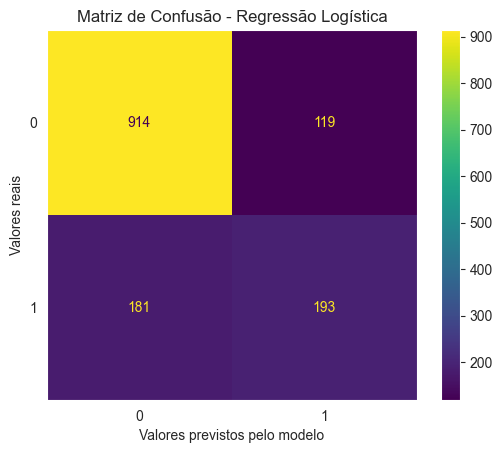

In [67]:
# calculando a matriz de confusão
cm = confusion_matrix(y_true = y_test, y_pred = y_pred_lr, labels = lr_model.classes_)

# exibindo-a na tela
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lr_model.classes_)
disp.plot()
plt.title('Matriz de Confusão - Regressão Logística')
plt.ylabel('Valores reais')
plt.xlabel('Valores previstos pelo modelo')
plt.grid(visible = False)
plt.show()

Pelo resultado acima, a quantidade de verdadeiros positivos previstos pelo modelo, ou seja, casos em que o modelo preveniu que o cliente não era churn e de fato ele não era, foi de 914. A quantidade de verdadeiros negativos previstos pelo modelo (casos em que o modelo preveniu que o cliente era churn e de fato ele era) foi de 193. Falsos positivos foram 181 casos e falsos negativos foram 119 casos. Desta forma, temos um total de erros = 181 + 119 = 300.

Para visualizar-se melhor a performance do modelo, foram calculadas as métricas de classificação abaixo.

In [28]:
print(f'Acurácia Treino: {accuracy_score(y_train, lr_model.predict(x_train))}')
print(f'Acurácia Teste: {accuracy_score(y_test, y_pred_lr)}')
print('------------------------------------------')
print(f'Acurácia Balanceada Treino: {balanced_accuracy_score(y_train, lr_model.predict(x_train))}')
print(f'Acurácia Balanceada Teste: {balanced_accuracy_score(y_test, y_pred_lr)}')
print('------------------------------------------')
print(f'Precisão Treino: {precision_score(y_train, lr_model.predict(x_train))}')
print(f'Precisão Teste: {precision_score(y_test, y_pred_lr)}')
print('------------------------------------------')
print(f'Recall Treino: {recall_score(y_train, lr_model.predict(x_train))}')
print(f'Recall Teste: {recall_score(y_test, y_pred_lr)}')
print('------------------------------------------')
print(f'F1 Treino: {f1_score(y_train, lr_model.predict(x_train))}')
print(f'F1 Teste: {f1_score(y_test, y_pred_lr)}')
print('------------------------------------------')
print(f'ROCAUC Treino: {roc_auc_score(y_train, lr_model.predict_proba(x_train)[:,1])}')
print(f'ROCAUC Teste: {roc_auc_score(y_test, lr_model.predict_proba(x_test)[:,1])}')

Acurácia Treino: 0.8088888888888889
Acurácia Teste: 0.7867803837953091
------------------------------------------
Acurácia Balanceada Treino: 0.7317960595042393
Acurácia Balanceada Teste: 0.7004221648177004
------------------------------------------
Precisão Treino: 0.664576802507837
Precisão Teste: 0.6185897435897436
------------------------------------------
Recall Treino: 0.5672240802675586
Recall Teste: 0.516042780748663
------------------------------------------
F1 Treino: 0.6120534103211837
F1 Teste: 0.5626822157434401
------------------------------------------
ROCAUC Treino: 0.8516641427842608
ROCAUC Teste: 0.8319079986126282


Plotando a curva ROC deste modelo,

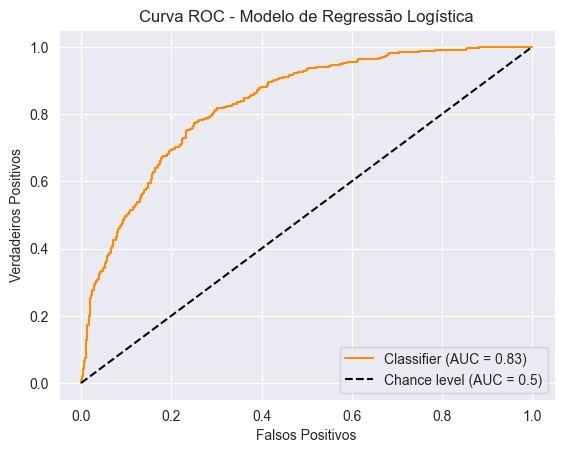

In [68]:
roc = lr_model.predict_proba(x_test)[:,1]

disp_roc = RocCurveDisplay.from_predictions(
    y_true = y_test,
    y_pred = roc,
    color = "darkorange",
    plot_chance_level = True
)
plt.title('Curva ROC - Modelo de Regressão Logística')
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdadeiros Positivos")
plt.show()

Observando o resultado da curva ROC plotada acima, percebe-se que o modelo de Regressão Logística de fato teve um bom desempenho, com valores bem acima da régua limite de 0.5.

### Moldelo Decision Tree Classifier

Testando agora com o modelo de classificação Decision Tree Classifier,

In [31]:
tree = DecisionTreeClassifier()

tree_model = tree.fit(x_train, y_train)

y_pred_tree = tree_model.predict(x_test)

Expondo a matriz de confusão deste modelo,

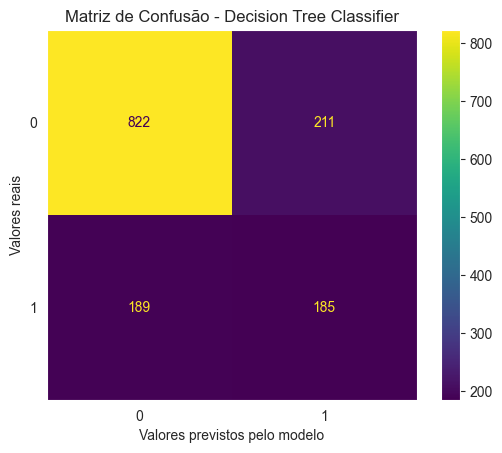

In [69]:
# calculando a matriz de confusão
cm = confusion_matrix(y_true = y_test, y_pred = y_pred_tree, labels = tree_model.classes_)

# exibindo-a na tela
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = tree_model.classes_)
disp.plot()
plt.title('Matriz de Confusão - Decision Tree Classifier')
plt.ylabel('Valores reais')
plt.xlabel('Valores previstos pelo modelo')
plt.grid(visible = False)
plt.show()

Pelo resultado acima, a quantidade de verdadeiros positivos previstos pelo modelo foi de 822, já a quantidade de verdadeiros negativos foi 185. Os casos de falsos positivos e negativos foram 189 e 211, respectivamente. Portanto, o total de erros deste modelo foi 189 + 211 = 400. Já percebe-se aqui que a performance deste modelo foi inferior ao anterior, onde ocorreram apenas 300 erros.

Calculando as suas métricas de performance,

In [34]:
print(f'Acurácia Treino: {accuracy_score(y_train, tree_model.predict(x_train))}')
print(f'Acurácia Teste: {accuracy_score(y_test, y_pred_tree)}')
print('------------------------------------------')
print(f'Acurácia Balanceada Treino: {balanced_accuracy_score(y_train, tree_model.predict(x_train))}')
print(f'Acurácia Balanceada Teste: {balanced_accuracy_score(y_test, y_pred_tree)}')
print('------------------------------------------')
print(f'Precisão Treino: {precision_score(y_train, tree_model.predict(x_train))}')
print(f'Precisão Teste: {precision_score(y_test, y_pred_tree)}')
print('------------------------------------------')
print(f'Recall Treino: {recall_score(y_train, tree_model.predict(x_train))}')
print(f'Recall Teste: {recall_score(y_test, y_pred_tree)}')
print('------------------------------------------')
print(f'F1 Treino: {f1_score(y_train, tree_model.predict(x_train))}')
print(f'F1 Teste: {f1_score(y_test, y_pred_tree)}')
print('------------------------------------------')
print(f'ROCAUC Treino: {roc_auc_score(y_train, tree_model.predict_proba(x_train)[:,1])}')
print(f'ROCAUC Teste: {roc_auc_score(y_test, tree_model.predict_proba(x_test)[:,1])}')

Acurácia Treino: 0.9976888888888888
Acurácia Teste: 0.7157071783937455
------------------------------------------
Acurácia Balanceada Treino: 0.9960789394835083
Acurácia Balanceada Teste: 0.6451964839442774
------------------------------------------
Precisão Treino: 0.9986541049798116
Precisão Teste: 0.4671717171717172
------------------------------------------
Recall Treino: 0.9926421404682274
Recall Teste: 0.4946524064171123
------------------------------------------
F1 Treino: 0.9956390472995639
F1 Teste: 0.4805194805194805
------------------------------------------
ROCAUC Treino: 0.9999856665074056
ROCAUC Teste: 0.6444626781452703


Avaliando os resultados das métricas acima, percebe-se claramente que para este modelo Decision Tree Classifier, temos um caso de Overfitting, onde as métricas da base de treino são bem próximas a 1 e bem maiores que as métricas da base de teste. Isto acontece quando o modelo de machine learning "decora" a base de treino, acertando praticamente tudo, mas quando é passada uma nova base diferente, o modelo se perde em suas previsões. Portanto, será uma otimização de hiperparâmetros neste modelo, para tentar corrigir este problema.

### Modelo Random Forest Classifier

Por último, testando o modelo Random Forest Classifier,

In [35]:
rf = RandomForestClassifier()

rf_model = rf.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)

Expondo a matriz de confusão deste modelo,

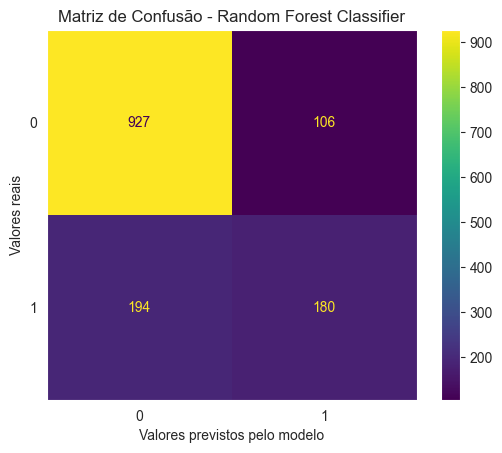

In [70]:
# calculando a matriz de confusão
cm = confusion_matrix(y_true = y_test, y_pred = y_pred_rf, labels = rf_model.classes_)

# exibindo-a na tela
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_model.classes_)
disp.plot()
plt.title('Matriz de Confusão - Random Forest Classifier')
plt.ylabel('Valores reais')
plt.xlabel('Valores previstos pelo modelo')
plt.grid(visible = False)
plt.show()

Avaliando-se a matriz acima, temos um total de verdadeiros positivos previstos pelo modelo de 927, e verdadeiros negativos com 180. Os casos de falsos positivos e negativos foram 194 e 106, respectivamente. Logo, o total de erros deste modelo foi 194 + 106 = 300. Já percebe-se aqui que temos um total de erros deste modelo igual ao modelo de Regressão Logística, e uma melhor performance que o anterior de Decision Tree.

Calculando as suas métricas de performance,

In [37]:
print(f'Acurácia Treino: {accuracy_score(y_train, rf_model.predict(x_train))}')
print(f'Acurácia Teste: {accuracy_score(y_test, y_pred_rf)}')
print('------------------------------------------')
print(f'Acurácia Balanceada Treino: {balanced_accuracy_score(y_train, rf_model.predict(x_train))}')
print(f'Acurácia Balanceada Teste: {balanced_accuracy_score(y_test, y_pred_rf)}')
print('------------------------------------------')
print(f'Precisão Treino: {precision_score(y_train, rf_model.predict(x_train))}')
print(f'Precisão Teste: {precision_score(y_test, y_pred_rf)}')
print('------------------------------------------')
print(f'Recall Treino: {recall_score(y_train, rf_model.predict(x_train))}')
print(f'Recall Teste: {recall_score(y_test, y_pred_rf)}')
print('------------------------------------------')
print(f'F1 Treino: {f1_score(y_train, rf_model.predict(x_train))}')
print(f'F1 Teste: {f1_score(y_test, y_pred_rf)}')
print('------------------------------------------')
print(f'ROCAUC Treino: {roc_auc_score(y_train, rf_model.predict_proba(x_train)[:,1])}')
print(f'ROCAUC Teste: {roc_auc_score(y_test, rf_model.predict_proba(x_test)[:,1])}')

Acurácia Treino: 0.9976888888888888
Acurácia Teste: 0.7867803837953091
------------------------------------------
Acurácia Balanceada Treino: 0.9973592361949031
Acurácia Balanceada Teste: 0.6893348380450481
------------------------------------------
Precisão Treino: 0.9946595460614153
Precisão Teste: 0.6293706293706294
------------------------------------------
Recall Treino: 0.9966555183946488
Recall Teste: 0.48128342245989303
------------------------------------------
F1 Treino: 0.9956565319077848
F1 Teste: 0.5454545454545455
------------------------------------------
ROCAUC Treino: 0.9999119745398302
ROCAUC Teste: 0.8142487744019549


Assim, apesar de na quantidade de erros termos o mesmo resultado do modelo de Regressão Logística, este modelo também é um caso de Overfitting. Igual ao caso anterior, a performance da base de treino está beirando o 100% e é bem melhor que os resultados da base de teste. Então, para este modelo também será feita uma otimização dos hiperparâmetros.

### Otimizando os hiperparâmetros dos modelos de árvore de descisão com GridSearch

#### Decision Tree Classifier

In [38]:
parameters = {
    "max_depth": [1,2,3,4,5,6,7,8,9,10]
}

grid_search_tree = GridSearchCV(estimator = tree_model, param_grid = parameters, scoring = "accuracy", cv = 5, n_jobs = -1)

In [39]:
grid_search_tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [40]:
grid_search_tree.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [41]:
tree_tunned = DecisionTreeClassifier(
    ccp_alpha =  0.0,
    class_weight = None,
    criterion = 'gini',
    max_depth = 6,
    max_features = None,
    max_leaf_nodes = None,
    min_impurity_decrease = 0.0,
    min_samples_leaf = 1,
    min_samples_split = 2,
    min_weight_fraction_leaf = 0.0,
    random_state = None,
    splitter = 'best'
)

In [42]:
tree_tunned.fit(x_train, y_train)

y_pred_tree_tun = tree_tunned.predict(x_test)

In [43]:
print(f'Acurácia Treino: {accuracy_score(y_train, tree_tunned.predict(x_train))}')
print(f'Acurácia Teste: {accuracy_score(y_test, y_pred_tree_tun)}')
print('------------------------------------------')
print(f'Acurácia Balanceada Treino: {balanced_accuracy_score(y_train, tree_tunned.predict(x_train))}')
print(f'Acurácia Balanceada Teste: {balanced_accuracy_score(y_test, y_pred_tree_tun)}')
print('------------------------------------------')
print(f'Precisão Treino: {precision_score(y_train, tree_tunned.predict(x_train))}')
print(f'Precisão Teste: {precision_score(y_test, y_pred_tree_tun)}')
print('------------------------------------------')
print(f'Recall Treino: {recall_score(y_train, tree_tunned.predict(x_train))}')
print(f'Recall Teste: {recall_score(y_test, y_pred_tree_tun)}')
print('------------------------------------------')
print(f'F1 Treino: {f1_score(y_train, tree_tunned.predict(x_train))}')
print(f'F1 Teste: {f1_score(y_test, y_pred_tree_tun)}')
print('------------------------------------------')
print(f'ROCAUC Treino: {roc_auc_score(y_train, tree_tunned.predict_proba(x_train)[:,1])}')
print(f'ROCAUC Teste: {roc_auc_score(y_test, tree_tunned.predict_proba(x_test)[:,1])}')

Acurácia Treino: 0.816
Acurácia Teste: 0.7732764747690121
------------------------------------------
Acurácia Balanceada Treino: 0.7628847570999376
Acurácia Balanceada Teste: 0.7065773330365324
------------------------------------------
Precisão Treino: 0.655195681511471
Precisão Teste: 0.5749318801089919
------------------------------------------
Recall Treino: 0.6494983277591974
Recall Teste: 0.5641711229946524
------------------------------------------
F1 Treino: 0.6523345649983205
F1 Teste: 0.5695006747638326
------------------------------------------
ROCAUC Treino: 0.868608112594848
ROCAUC Teste: 0.814098648347837


#### Random Forest Classifier

In [44]:
parameters = {
    "max_depth": [1,2,3,4,5,6,7,8,9,10],
    "n_estimators": [100,300,500] 
}

grid_search_forest = GridSearchCV(estimator = rf_model, param_grid = parameters, scoring = 'accuracy', cv = 5, n_jobs = -1)

In [45]:
grid_search_forest.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [46]:
grid_search_forest.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [47]:
rf_tunned = RandomForestClassifier(
    bootstrap = True,
    ccp_alpha = 0.0,
    class_weight = None,
    criterion = 'gini',
    max_depth = 7,
    max_features = 'sqrt',
    max_leaf_nodes = None,
    max_samples = None,
    min_impurity_decrease = 0.0,
    min_samples_leaf = 1,
    min_samples_split = 2,
    min_weight_fraction_leaf = 0.0,
    n_estimators = 100,
    n_jobs = None,
    oob_score = False,
    random_state = None,
    verbose = 0,
    warm_start = False
)

In [48]:
rf_tunned.fit(x_train, y_train)

y_pred_rf_tun = rf_tunned.predict(x_test)

In [49]:
print(f'Acurácia Treino: {accuracy_score(y_train, rf_tunned.predict(x_train))}')
print(f'Acurácia Teste: {accuracy_score(y_test, y_pred_rf_tun)}')
print('------------------------------------------')
print(f'Acurácia Balanceada Treino: {balanced_accuracy_score(y_train, rf_tunned.predict(x_train))}')
print(f'Acurácia Balanceada Teste: {balanced_accuracy_score(y_test, y_pred_rf_tun)}')
print('------------------------------------------')
print(f'Precisão Treino: {precision_score(y_train, rf_tunned.predict(x_train))}')
print(f'Precisão Teste: {precision_score(y_test, y_pred_rf_tun)}')
print('------------------------------------------')
print(f'Recall Treino: {recall_score(y_train, rf_tunned.predict(x_train))}')
print(f'Recall Teste: {recall_score(y_test, y_pred_rf_tun)}')
print('------------------------------------------')
print(f'F1 Treino: {f1_score(y_train, rf_tunned.predict(x_train))}')
print(f'F1 Teste: {f1_score(y_test, y_pred_rf_tun)}')
print('------------------------------------------')
print(f'ROCAUC Treino: {roc_auc_score(y_train, rf_tunned.predict_proba(x_train)[:,1])}')
print(f'ROCAUC Teste: {roc_auc_score(y_test, rf_tunned.predict_proba(x_test)[:,1])}')

Acurácia Treino: 0.8229333333333333
Acurácia Teste: 0.7860696517412935
------------------------------------------
Acurácia Balanceada Treino: 0.7415736069383823
Acurácia Balanceada Teste: 0.6837335831983061
------------------------------------------
Precisão Treino: 0.7080900750625522
Precisão Teste: 0.6327272727272727
------------------------------------------
Recall Treino: 0.5678929765886288
Recall Teste: 0.46524064171123
------------------------------------------
F1 Treino: 0.6302895322939867
F1 Teste: 0.5362095531587057
------------------------------------------
ROCAUC Treino: 0.8888763189647493
ROCAUC Teste: 0.8315223299563598


### Selecionando o melhor modelo

In [62]:
acuracia = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_tree_tun), accuracy_score(y_test, y_pred_rf_tun)]
acuracia_balanceada = [balanced_accuracy_score(y_test, y_pred_lr), balanced_accuracy_score(y_test, y_pred_tree_tun),
                       balanced_accuracy_score(y_test, y_pred_rf_tun)]
precisao = [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_tree_tun), precision_score(y_test, y_pred_rf_tun)]
recall = [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_tree_tun), recall_score(y_test, y_pred_rf_tun)]
f1 = [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_tree_tun), f1_score(y_test, y_pred_rf_tun)]
roc_auc = [roc_auc_score(y_test, lr_model.predict_proba(x_test)[:,1]), roc_auc_score(y_test, tree_tunned.predict_proba(x_test)[:,1]),
           roc_auc_score(y_test, rf_tunned.predict_proba(x_test)[:,1])]

modelos = ['LogisticRegression', 'DecisionTreeClassifier - Otimizado', 'RandomForestClassifier - Otimizado']

metricas = pd.DataFrame(
    data = {
        'Modelos': modelos,
        'Acurácia': acuracia,
        'Acurácia Balanceada': acuracia_balanceada,
        'Precisão': precisao,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    }
).sort_values(by = 'Acurácia', ascending = False)

metricas.style.format('{:.2%}', subset = ['Acurácia', 'Acurácia Balanceada', 'Precisão', 'Recall', 'F1 Score',
                                                    'ROC AUC Score'])

,Modelos,Acurácia,Acurácia Balanceada,Precisão,Recall,F1 Score,ROC AUC Score
0,LogisticRegression,78.68%,70.04%,61.86%,51.60%,56.27%,83.19%
2,RandomForestClassifier - Otimizado,78.61%,68.37%,63.27%,46.52%,53.62%,83.15%
1,DecisionTreeClassifier - Otimizado,77.33%,70.66%,57.49%,56.42%,56.95%,81.41%


## Conclusão